- NPZ파일 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/data/animals.npz')

In [4]:
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(960, 224, 224, 3)
(960,)
(240, 224, 224, 3)
(240,)


### MLP(다층퍼셉트론)로 모델링

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
h=model.fit(X_train,y_train,
            validation_split=0.2,
            epochs=50,
            batch_size=128)

Epoch 1/50
6/6 [==============================] - 8s 1s/step - loss: 8307.1299 - acc: 0.3359 - val_loss: 1.0986 - val_acc: 0.3438
Epoch 2/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985 - val_acc: 0.3438
Epoch 3/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985 - val_acc: 0.3438
Epoch 4/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985 - val_acc: 0.3438
Epoch 5/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985 - val_acc: 0.3438
Epoch 6/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985 - val_acc: 0.3438
Epoch 7/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985 - val_acc: 0.3438
Epoch 8/50
6/6 [==============================] - 6s 1s/step - loss: 1.0986 - acc: 0.3346 - val_loss: 1.0985

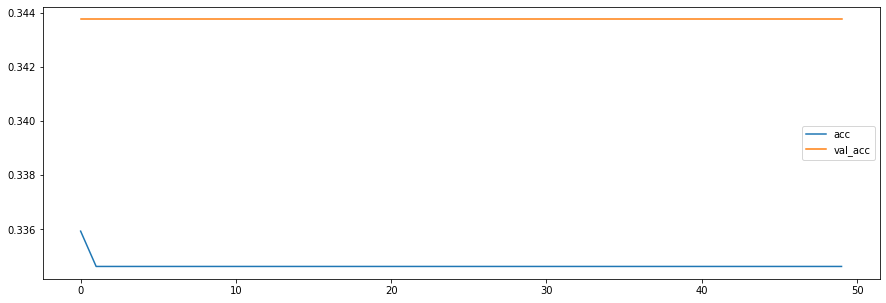

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 141ms/step - loss: 1.0986 - acc: 0.3208


[1.0986355543136597, 0.32083332538604736]

### CNN 모델 만들기

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [ ]:
# 1. 모델 설계
cnn_model = Sequential()

# 1) 특성 추출부(Conv - 특징이 되는 정보를 부각)
# Conv2D : 2D이미지 데이터에 대해 특징이 되는 부분들을 부각시켜줌
# Maxpool2D : 2D이미지 데이터에 대해 필요없는 정보를 삭제(이미지 크기 축소)
cnn_model.add(Conv2D(input_shape=(224,224,3),
                     # 필터의 개수 -> 추출하는 특징의 특성맵 개수를 설정
                     filters=128,
                     # 필터의 크기 설정
                     kernel_size=(3,3),
                     # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용해주세요~!(valid:패딩적용x)
                     padding='same',
                     activation='relu'
                     ))
# 2) 특성 추출부(pooling - 불필요한 정보 삭제)
# pool_size : 디폴트 값은 2(2 x 2)
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=256,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'
                     ))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'
                     ))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'
                     ))
cnn_model.add(MaxPool2D())

# 3) 분류기(MLP)
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(32,activation='relu'))

cnn_model.add(Dense(3,activation='softmax'))

cnn_model.summary()

# CNN 첫 층에서의 파라미터 수는 입력필터 수 * 필터크기 * 채널크기 * 채널수 + 필터수

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 128)     

In [ ]:
# 2. 학습/평가방법설정
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['acc'])

In [ ]:
h=cnn_model.fit(X_train,y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=128)

Epoch 1/50
6/6 [==============================] - 7s 1s/step - loss: 1.4838 - acc: 0.8190 - val_loss: 1.2345 - val_acc: 0.5156
Epoch 2/50
6/6 [==============================] - 6s 1s/step - loss: 0.7429 - acc: 0.7096 - val_loss: 1.1193 - val_acc: 0.5990
Epoch 3/50
6/6 [==============================] - 6s 1s/step - loss: 0.6340 - acc: 0.7422 - val_loss: 0.9633 - val_acc: 0.5833
Epoch 4/50
6/6 [==============================] - 6s 1s/step - loss: 0.4749 - acc: 0.7865 - val_loss: 1.1792 - val_acc: 0.6458
Epoch 5/50
6/6 [==============================] - 6s 1s/step - loss: 0.3386 - acc: 0.8776 - val_loss: 1.6212 - val_acc: 0.6458
Epoch 6/50
6/6 [==============================] - 6s 1s/step - loss: 0.2471 - acc: 0.8932 - val_loss: 1.7522 - val_acc: 0.6198
Epoch 7/50
6/6 [==============================] - 6s 1s/step - loss: 0.1680 - acc: 0.9362 - val_loss: 1.9721 - val_acc: 0.6302
Epoch 8/50
6/6 [==============================] - 6s 1s/step - loss: 0.1213 - acc: 0.9544 - val_loss: 1.8601 - 

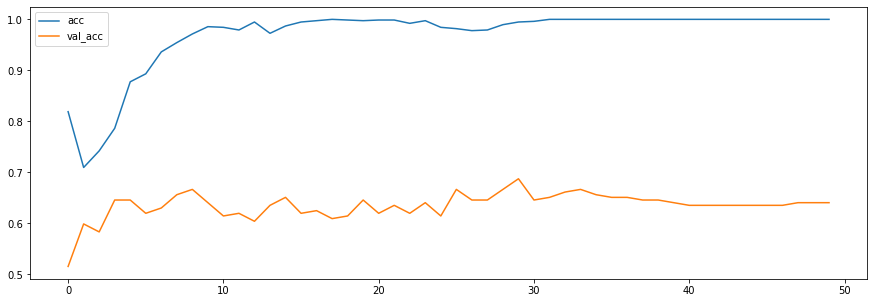

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [8]:
# 정확도 외에 정밀도, 재현율, F1스코어까지 확인해보자!
from sklearn.metrics import classification_report

In [ ]:
pre = cnn_model.predict(X_test)
pre

In [ ]:
# classification_report(평가용 정답, 모델이 예측한 정답)
print(classification_report(y_test,np.argmax(pre, axis=1)))

# precision(정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율
# recall(재현율) : 실제 True인 것 중에서 모델이 True라고 예측한 비율
# accuracy(정확도) : 전체중에서 모델이 옳게 예측한 비율
# f1-score : 정밀도와 재현율의 조화평균값

# -> 결국은 pre값이 각 레이블들에 대한 확률값으로 나오기 때문에 그중 가장 높은 값의 인덱스를 
#    반환하여 y_test와 비교한 후 report를 출력하게 됨

              precision    recall  f1-score   support

           0       0.49      0.40      0.44        84
           1       0.55      0.69      0.61        77
           2       0.82      0.77      0.80        79

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.62       240
weighted avg       0.62      0.62      0.61       240



In [ ]:
# argmax : 가장 큰 값의 인덱스를 반환시켜주는 함수
# axis=1 : 이차원 배열에서 1차원 배열 하나씩 보겠다는 의미
np.argmax(pre, axis=1)


array([1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0,
       2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1])

- 직접 설계한 CNN모델로는 한 번에 좋은 결과를 도출하기는 어려움...ㅠ

### VGG16 전이학습

In [9]:
from tensorflow.keras.applications import VGG16

In [ ]:
pre_trained_model = VGG16(include_top=False,
                          weights='imagenet',
                          input_shape=(224,224,3)

                          )
# include_top=false : 불러온 모델의 MLP층(분류기)을 사용하지 않고 특성추출부만 사용(=특성추출방식)
# (우리꺼에 맞춰야 하기 떄문에 false로...)
# -> 기존 이미지넷 챌린지 대회에서는 1000개이 이미지를 분류했으나 우리는 3개의 이미지를 분류
#    할 것이기 때문에 MLP층을 다르게 설정해줘야 제대로 된 결과값을 얻을 수 있음!
# weights = 'imagenet' : 이미지넷 챌린지 대회에서 학습한 w,b값을 그대로 쓰겠습니다!

In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
cnn_model2 = Sequential()

# VGG16 모델의 특성 추출부
cnn_model2.add(pre_trained_model)

# MLP
cnn_model2.add(Flatten())
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(3, activation='softmax'))

cnn_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               3211392   
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 3)                 99        
                                                                 
Total params: 17,936,515
Trainable params: 17,936,515


In [ ]:
cnn_model2.compile(loss='sparse_categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['acc'])

In [ ]:
cnn_model2.fit(X_train,y_train,
               validation_split=0.2,
               epochs=50,
               batch_size=128)

Epoch 1/50
6/6 [==============================] - 40s 3s/step - loss: 25.7261 - acc: 0.3346 - val_loss: 1.1767 - val_acc: 0.3438
Epoch 2/50
6/6 [==============================] - 11s 2s/step - loss: 1.1086 - acc: 0.3229 - val_loss: 1.0625 - val_acc: 0.3490
Epoch 3/50
6/6 [==============================] - 11s 2s/step - loss: 1.1242 - acc: 0.3802 - val_loss: 1.0825 - val_acc: 0.4062
Epoch 4/50
6/6 [==============================] - 11s 2s/step - loss: 1.1119 - acc: 0.3620 - val_loss: 1.0890 - val_acc: 0.3438
Epoch 5/50
6/6 [==============================] - 11s 2s/step - loss: 1.0823 - acc: 0.3411 - val_loss: 1.0573 - val_acc: 0.4010
Epoch 6/50
6/6 [==============================] - 11s 2s/step - loss: 1.0642 - acc: 0.3984 - val_loss: 1.0162 - val_acc: 0.4896
Epoch 7/50
6/6 [==============================] - 11s 2s/step - loss: 0.9823 - acc: 0.5469 - val_loss: 0.9197 - val_acc: 0.4948
Epoch 8/50
6/6 [==============================] - 11s 2s/step - loss: 0.9399 - acc: 0.5456 - val_loss: 

In [ ]:
pre = cnn_model2.predict(X_test)

print(classification_report(y_test,np.argmax(pre, axis=1)))

8/8 [==============================] - 5s 341ms/step
              precision    recall  f1-score   support

           0       0.63      0.46      0.53        84
           1       0.62      0.69      0.65        77
           2       0.78      0.92      0.85        79

    accuracy                           0.69       240
   macro avg       0.68      0.69      0.68       240
weighted avg       0.68      0.69      0.68       240



- 결과는 좀 더 좋아졌지만 아직 많이 부족하기 때문에 더 튜닝을 해보자~!
- 미세조정방식도 사용해보자!

In [ ]:
pre_trained_model2 = VGG16(include_top=False,
                          weights='imagenet',
                          input_shape=(224,224,3)

                          )

In [ ]:
pre_trained_model2.summary()

In [ ]:
# VGG16 모델의 실제 층 이름에 접근
for layer in pre_trained_model2.layers:
  print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
# 미세조정방식
for layer in pre_trained_model2.layers:
  if layer.name =='block5_conv3':
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
pre_trained_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
cnn_model3 = Sequential()

# VGG16 모델의 특성 추출부
cnn_model3.add(pre_trained_model2)

# MLP
cnn_model3.add(Flatten())
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dense(64, activation='relu'))
cnn_model3.add(Dense(32, activation='relu'))
cnn_model3.add(Dense(3, activation='softmax'))

cnn_model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_17 (Dense)            (None, 128)               3211392   
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 17,936,515
Trainable params: 5,581,635
N

In [16]:
cnn_model3.compile(loss='sparse_categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['acc'])

In [ ]:
cnn_model3.fit(X_train,y_train,
               validation_split=0.2,
               epochs=50,
               batch_size=128)

In [ ]:
pre = cnn_model3.predict(X_test)

print(classification_report(y_test,np.argmax(pre, axis=1)))

8/8 [==============================] - 1s 155ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        84
           1       0.92      0.91      0.92        77
           2       0.92      0.89      0.90        79

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



- VGG16 모델로 전이학습을 진행한 결과 우리가 직겁 설계한 CNN모델에 비해 훨씬 결과가 잘 나오는 것을 확인할 수 있었음!

### 데이터 증강(Data Augmentation)
- 기존 이미지와 유사하 이미지를 추가로 생성하여 학습시 반영해주는 데이터 증식 기법

In [10]:
# ImageDataGenerator : 이미지 데이터를 생성하기 위한 조건 설정해주는 함수
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전 각도
                         width_shift_range=0.2,  # 20% 내외 수평이동
                         height_shift_range=0.2, # 20% 내외 수직이동
                         zoom_range=0.2,         # 0.8~1.2배로 축소/확대
                         horizontal_flip=True,   # 수평방향으로 뒤집기
                         fill_mode='nearest'     # 이미지가 변형되면서 비는 공간에 가장 근처의 픽셀로 채워줌
                         )

- 이미지 증식 관련 keras 공식 문서 참조 : https://keras.io/ko/preprocessing/image/

In [12]:
pre_trained_model3 = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )

# 미세조정방식
for layer in pre_trained_model3.layers:
  if layer.name =='block5_conv3':
    layer.trainable = True
  else:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
cnn_model4 = Sequential()

# VGG16 모델의 특성 추출부
cnn_model4.add(pre_trained_model3)

# MLP
cnn_model4.add(Flatten())
cnn_model4.add(Dense(128, activation='relu'))
cnn_model4.add(Dense(64, activation='relu'))
cnn_model4.add(Dense(32, activation='relu'))
cnn_model4.add(Dense(3, activation='softmax'))


In [18]:
cnn_model4.compile(loss='sparse_categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['acc'])

In [19]:
# flow : ImageDataGenerator로 설정한 조건을 통해 이미지를 생성하여 학습에 적용시켜주는 함수
cnn_model4.fit(aug.flow(X_train,y_train, batch_size=128),
               # 한 epoch당 7.5번 돌고 끝나게 됨(128 * 7.5으로 총 960개의 새로운 이미지가 1epoch에 생성)
               steps_per_epoch=len(X_train) / 128,
               epochs=50
               )
# 증강된 이미지 960개로 학습, 2epoch때는 960개 추가되어 총 1920개로 학습....

Epoch 1/50
7/7 [==============================] - 37s 2s/step - loss: 5.0418 - acc: 0.5865
Epoch 2/50
7/7 [==============================] - 11s 1s/step - loss: 0.8879 - acc: 0.7823
Epoch 3/50
7/7 [==============================] - 17s 2s/step - loss: 0.4161 - acc: 0.8583
Epoch 4/50
7/7 [==============================] - 12s 2s/step - loss: 0.2255 - acc: 0.9323
Epoch 5/50
7/7 [==============================] - 18s 2s/step - loss: 0.1815 - acc: 0.9396
Epoch 6/50
7/7 [==============================] - 16s 2s/step - loss: 0.1579 - acc: 0.9354
Epoch 7/50
7/7 [==============================] - 11s 1s/step - loss: 0.1057 - acc: 0.9615
Epoch 8/50
7/7 [==============================] - 11s 2s/step - loss: 0.1080 - acc: 0.9656
Epoch 9/50
7/7 [==============================] - 11s 2s/step - loss: 0.0824 - acc: 0.9740
Epoch 10/50
7/7 [==============================] - 11s 1s/step - loss: 0.0583 - acc: 0.9812
Epoch 11/50
7/7 [==============================] - 11s 2s/step - loss: 0.0967 - acc: 0.96

In [20]:
pre = cnn_model4.predict(X_test)

print(classification_report(y_test, np.argmax(pre, axis=1)))

8/8 [==============================] - 5s 351ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        84
           1       0.96      0.91      0.93        77
           2       0.88      0.95      0.91        79

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240



- 데이터의 수가 적을 경우 데이터 증강을 진행한 후 정확도가 더 향성됨
- 데이터의 종류에 따라 증가되는 %는 다를 수 있음